# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment2 using this file format:</u> <b>Yourfirstname_lastname_Assignment2.ipynb</b> 

#### <b>Deadline</b>: <u>October-1-2019 11:59 PM.</u>


#### <font color='red'>NOTE: Please refer to the Ipython notebook named linearRegression.ipynb from class lecture. There are overlaps between that notebook and the assignment 2 </font>


#### Import your needed libraries in this cell

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Assignment 2 -- Part 1(Logistic regression without regularization )

In this exercise, you will implement logistic regression and apply it to dataset Assignment2_data1.txt

Import and examine the dataset Assignment2_data1.txt. There are two continuous independent variables in the data - “Exam 1” and “Exam 2”. Our prediction target is the “Admitted” label, which is binary-valued. A value of 1 means the student was admitted and a value of 0 means the student was not admitted.

In this part of the Assignment, you will build a logistic regression model to predict whether a student gets admitted into a university (a model that estimates an applicant’s probability of admission based the scores from those two exams)


### Part 1, Q1  -- 10%

1. [5 points] Load the data and split it into X(features vector) and y(target/output vector).You can follow the way that has been shown in the class in the LinearRegression.ipynb. 

2. [5 points] Visualize the data. 
For visualizing,exam 1 score will be in the X-axis, exam 2 score will be on the Y-axis. Put + (plus) for an admitted student, and circle for a student who was not admitted.

### Part 1, Q2  -- 5%

Before you start with the implementation of the cost function and gradient descent algorithm for logistic Regression, at first implement the function "sigmoid"  that can be called by the rest of your program. test it when you are finished, try testing a few values by calling sigmoid(x). For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5.

In [ ]:
#Choose the parameters and return value on your own
def sigmoid():
    #Start you code from here
    return
    

### Part 1, Q3   -- 10%



1.  [5 points] Implement cost function (calcLogRegressionCost) as detailed in the cell below.

2.  [5 points] gradient descent (logRegressionGradientDescent) as detailed in the cell below.   

Hint: Once you are done,  call your "calcLogRegressionCost" using the initial parameters of θ. You should see that the cost is about 0.693.

Note: no need to add the regularization term. 

In [ ]:
#You can may change the number of parameters according to your wish for
#all the funtions depending on your implementation.

def calcLogRegressionCost(X, y, theta):
    #X is the feature vector
    #Y is the target vector/ output vector
    #theta is the weight vector 
    
    #Start you code from here
    
    return

def logRegressionGradientDescent(X, y, theta0, alpha,iterations):
    #X is the feature vector
    #Y is the target vector/ output vector
    #theta is the weight vector 
    #alpha is the learning rate
    #iteration is the steps you want to take 
    #Start you code from here\
    
    #you should return theta or loss or the both depending on your way
    #of implementation
    return




### Part 1, Q4   -- 20%

As you have the gradient decent algorithm implemented,

1. [3 Points] Run the gradient descent algorithm to fit your parameters theta to the training set.


2. [2 Points] Report optimal final θ.


3. [10 Points] Plot the cost with the number of iterations. what is the best learning rate you choosed and why ?

4. [5 Points]  Plot the decision boundary with the training data.

Hint: You can have a look at the following link for help:


https://stackoverflow.com/questions/19054923/plot-decision-boundary-matplotlib

### Part 1, Q5  -- 10%
At this point, you have the optimal theta.

1. [5 Points] Implement the predict_proba function.


In [ ]:
def predict_proba(X,theta):
    #you need to know the probability of a certain test sample to fall in a certain class.
    #For this you need a function which will give you the probability.
    #You just need to use the sigmoid function to get the probability.
    
    
    #Start your code from here
    return 
    #This function should return a probability

2. [5 Points] Suppose,a student has scored 100 in exam 1 and scored 50 in exam 2. Using the following predict_proba function find  the admission probability of this student.

# Assignment 2 -- Part 2(Enhanced Logistic regression )

In this part of the assignment, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance(QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Import and examine the dataset Assignment2_data2.txt. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. 

### Part 2, Q1 -- 5%

Load the data and visualize it.(You can follow the steps from part1, Q1)

For visualizing,test 1 score will be in the X-axis, test 2 score will be on the Y-axis. Put + (plus) for the accepted one, and circle for rejected one.

### Part 2, Q2 -- 15%
One way to fit the data better is to create more features from each data
point.  

1. [10 Points] Map the features into all polynomial terms of x1 and x2 up to the sixth power.

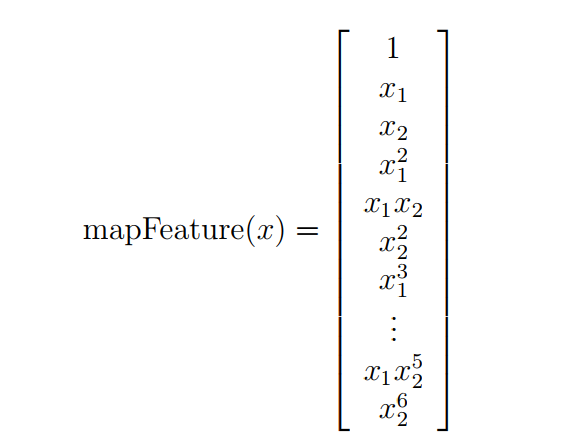


2. [2 Points] Report optimal final θ.

3. [3 Points] Plot the decision boundary with the training data.

Hint: You can use the cost and GradientDescent algorithms implemented in assignment Part1.

### Part 2, Q3 -- 15% <u>

1. [5 Points] Implement Regularized Logistic Regression cost function.

2. [5 Points] Implement RegularizedlogRegressionGradientDescent .

4. [5 Points] Plot the cost with the number of iterations.

### Part 2, Q4 -- 10%
1. [5 Points] Demonstrate the impact of the regularization parameter λ with 1, 0, 100, 1000. 


2. [5 Points] Plot the decision boundary of for the 4 different λ values. 

# Assignment 2 -- Part 3( This part is for graduate students)


What’s the best (or at least the most popular) Halloween candy? That was the question this dataset was collected to answer. Data was collected by creating a website where participants were shown presenting two fun-sized candies and asked to click on the one they would prefer to receive. In total, more than 269 thousand votes were collected from 8,371 different IP addresses.


In this part, you will use the logistic regression from scikit learn to classify this the candies in 2 classes. 

The part of loading data and splitting into test and train is done for you.

To know more about train_test_split follow the link below: 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
Chocolate_data = pd.read_csv("candy-data.csv")
print(Chocolate_data.head())
Chocolate_data.drop("competitorname", inplace = True, axis=1)
y = Chocolate_data.chocolate.values
x_data = Chocolate_data.drop(["chocolate"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split( x_data, y, test_size=0.2, random_state=42)

### Part 3, Q1-- 10%

1.[7 points] Import the logistic regression from scikit learn and train the logistic regression classifier and report the accuracy score.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
prediction=clf.predict(X_test)
metrics.accuracy_score(prediction,y_test)

2.[3 Points] Scaling the features can help you for fast convergence and improve your accuracy. Scale the features(X_train and X_test) below using anykind of scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


### Part 3, Q2-- 5%

Agian,Import the logistic regression from scikit learn and train the logistic regression classifier with scaled X_train and X_test. After that test logistic regression classifier's accuracy with X_test and y_test and report the accuracy. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
prediction=clf.predict(X_test)
metrics.accuracy_score(prediction,y_test)

### Part 3, Q3-- 10% <b>(Bonus for graduate student)</b>

If you have followed the basic steps correctly, you should get an accuracy around 93-94%. Now, try to take the accuracy to 96-97%. You can use feature generation, feature engineering and so on.

Note: It would take a decent amount of time to improve the accuracy.